In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.size"] = "26"
#plt.rcParams['savefig.facecolor'] = "0.5"
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [16]:
bColor = "red"
oColor = "green"
hColor = "blue"

In [17]:
result = pd.read_csv(r"Substitution/news_vary_l.csv")

In [18]:
result

,Dataset,Number_Of_Candidates,Number_of_voters,Max_Ballot_length,Preferred_winner,Upper_Bound,heuristicV1_margin,Our_margin,Blom_margin,heuristicV1_runtime,...,Blom_runtime,Margin_Blom=Ours,Upper_bound_correct,HeuristicV1_equl_margin,Our_number_LPS,Blom_number_LPS,Our_number_node_explored,Blom_number_node_explored,Our_blom_lb_calls,Blom_Leaf_node_explored
0,movieLens_movie=8_ballot=10000000bs=4,8,47357,4,sor-trondelag,0,0,0.0,0.0,0.003311,...,0.235000,1,1,1,0,31,1,32,0,1
1,movieLens_movie=8_ballot=10000000bs=4,8,47357,4,oslo,0,0,0.0,0.0,0.003392,...,0.282615,1,1,1,0,31,1,32,0,1
2,movieLens_movie=8_ballot=10000000bs=4,8,47357,4,akershus,0,0,0.0,0.0,0.003820,...,0.177051,1,1,1,0,31,1,32,0,1
3,movieLens_movie=8_ballot=10000000bs=4,8,47357,4,hedmark,0,0,0.0,0.0,0.003588,...,0.161186,1,1,1,0,31,1,32,0,1
4,movieLens_movie=8_ballot=10000000bs=4,8,47357,4,florida,0,0,0.0,0.0,0.003152,...,0.162483,1,1,1,0,31,1,32,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,movieLens_movie=8_ballot=10000000bs=8,8,47357,7,salzburg,16504,16504,8252.0,8252.0,0.000741,...,3.802232,1,1,0,31,504,729,505,646,1
1446,movieLens_movie=8_ballot=10000000bs=8,8,47357,7,new mexico,14166,14166,7083.0,7083.0,0.000867,...,1.228040,1,1,0,36,137,379,138,342,1
1447,movieLens_movie=8_ballot=10000000bs=8,8,47357,7,seoul teugbyeol-si,11914,11914,5957.0,5957.0,0.001399,...,1.797426,1,1,0,3,192,260,193,256,1
1448,movieLens_movie=8_ballot=10000000bs=8,8,47357,7,ciudad real,14166,14166,7083.0,7083.0,0.003181,...,1.112687,1,1,0,36,137,379,138,342,1


In [19]:
result['margin_difference'] = result['heuristicV1_margin'] - result['Blom_margin']

In [20]:
result

,Dataset,Number_Of_Candidates,Number_of_voters,Max_Ballot_length,Preferred_winner,Upper_Bound,heuristicV1_margin,Our_margin,Blom_margin,heuristicV1_runtime,...,Margin_Blom=Ours,Upper_bound_correct,HeuristicV1_equl_margin,Our_number_LPS,Blom_number_LPS,Our_number_node_explored,Blom_number_node_explored,Our_blom_lb_calls,Blom_Leaf_node_explored,margin_difference
0,movieLens_movie=8_ballot=10000000bs=4,8,47357,4,sor-trondelag,0,0,0.0,0.0,0.003311,...,1,1,1,0,31,1,32,0,1,0.0
1,movieLens_movie=8_ballot=10000000bs=4,8,47357,4,oslo,0,0,0.0,0.0,0.003392,...,1,1,1,0,31,1,32,0,1,0.0
2,movieLens_movie=8_ballot=10000000bs=4,8,47357,4,akershus,0,0,0.0,0.0,0.003820,...,1,1,1,0,31,1,32,0,1,0.0
3,movieLens_movie=8_ballot=10000000bs=4,8,47357,4,hedmark,0,0,0.0,0.0,0.003588,...,1,1,1,0,31,1,32,0,1,0.0
4,movieLens_movie=8_ballot=10000000bs=4,8,47357,4,florida,0,0,0.0,0.0,0.003152,...,1,1,1,0,31,1,32,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,movieLens_movie=8_ballot=10000000bs=8,8,47357,7,salzburg,16504,16504,8252.0,8252.0,0.000741,...,1,1,0,31,504,729,505,646,1,8252.0
1446,movieLens_movie=8_ballot=10000000bs=8,8,47357,7,new mexico,14166,14166,7083.0,7083.0,0.000867,...,1,1,0,36,137,379,138,342,1,7083.0
1447,movieLens_movie=8_ballot=10000000bs=8,8,47357,7,seoul teugbyeol-si,11914,11914,5957.0,5957.0,0.001399,...,1,1,0,3,192,260,193,256,1,5957.0
1448,movieLens_movie=8_ballot=10000000bs=8,8,47357,7,ciudad real,14166,14166,7083.0,7083.0,0.003181,...,1,1,0,36,137,379,138,342,1,7083.0


In [21]:
result.columns

Index(['Dataset', 'Number_Of_Candidates', 'Number_of_voters',
       'Max_Ballot_length', 'Preferred_winner', 'Upper_Bound',
       'heuristicV1_margin', 'Our_margin', 'Blom_margin',
       'heuristicV1_runtime', 'Our_runtime', 'Blom_runtime',
       'Margin_Blom=Ours', 'Upper_bound_correct', 'HeuristicV1_equl_margin',
       'Our_number_LPS', 'Blom_number_LPS', 'Our_number_node_explored',
       'Blom_number_node_explored', 'Our_blom_lb_calls',
       'Blom_Leaf_node_explored', 'margin_difference'],
      dtype='object')

In [22]:
avg = result.groupby(['Max_Ballot_length'])['Dataset', 'Number_Of_Candidates', 'Number_of_voters',
       'Max_Ballot_length', 'Preferred_winner', 'Upper_Bound',
       'heuristicV1_margin', 'Our_margin', 'Blom_margin',
       'heuristicV1_runtime', 'Our_runtime', 'Blom_runtime',
       'Margin_Blom=Ours', 'Upper_bound_correct', 'HeuristicV1_equl_margin',
       'Our_number_LPS', 'Blom_number_LPS', 'Our_number_node_explored',
       'Blom_number_node_explored', 'Our_blom_lb_calls',
       'Blom_Leaf_node_explored', 'margin_difference'].mean()

C:\Users\mouin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [23]:
avg.to_csv('tempAvgmovie=10.csv')

In [24]:
avgDf = pd.read_csv('tempAvgmovie=10.csv')
avgDf

,Max_Ballot_length,Number_Of_Candidates,Number_of_voters,Max_Ballot_length.1,Upper_Bound,heuristicV1_margin,Our_margin,Blom_margin,heuristicV1_runtime,Our_runtime,...,Margin_Blom=Ours,Upper_bound_correct,HeuristicV1_equl_margin,Our_number_LPS,Blom_number_LPS,Our_number_node_explored,Blom_number_node_explored,Our_blom_lb_calls,Blom_Leaf_node_explored,margin_difference
0,4,8.0,47357.0,4.0,5809.706897,5809.706897,2905.024138,2905.024138,0.001745,0.358201,...,1.0,1.0,0.517241,8.041379,107.989655,158.655172,108.989655,148.613793,1.0,2904.682759
1,5,8.0,47357.0,5.0,5915.786207,5915.786207,2958.093103,2958.093103,0.002177,0.359331,...,1.0,1.0,0.517241,7.979310,108.775862,159.379310,109.775862,149.124138,1.0,2957.693103
2,6,8.0,47357.0,6.0,5961.544828,5961.544828,2980.965517,2980.965517,0.002506,0.357847,...,1.0,1.0,0.517241,7.979310,109.603448,160.206897,110.603448,149.951724,1.0,2980.579310
3,7,8.0,47357.0,7.0,5982.779310,5982.779310,2991.500000,2991.500000,0.002740,0.353049,...,1.0,1.0,0.517241,7.979310,111.775862,161.344828,112.775862,150.710345,1.0,2991.279310


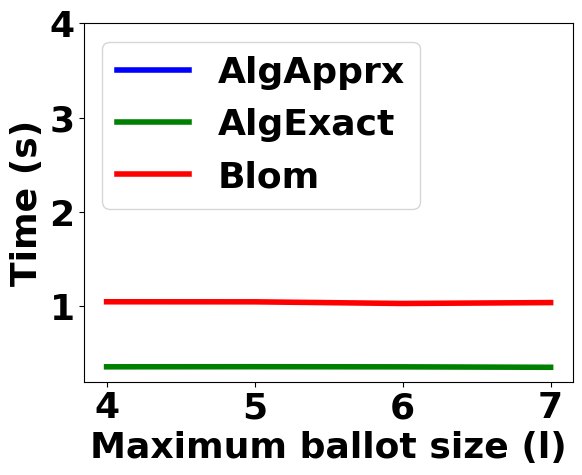

In [25]:
#import matplotlib.pyplot as plt
#plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.tight_layout()


x  = avgDf['Max_Ballot_length'].to_list()
y = avgDf['heuristicV1_runtime'].to_list()
z = avgDf['Our_runtime'].to_list()
u = avgDf['Blom_runtime'].to_list()


plt.plot(x,y,color=hColor,linewidth=4)
plt.plot(x,z,color=oColor,linewidth=4)
plt.plot(x,u,color=bColor,linewidth=4)
plt.tight_layout()
# create an index for each tick position

plt.ylabel('Time (s)')
plt.xlabel('Maximum ballot size (l)')
#plt.xticks([4,6,8,10,12], ['4','6','8','10','12'])
plt.ylim(4*5/100,4)

plt.legend(["AlgApprx","AlgExact","Blom"],loc='upper left')
fig.savefig(r"Figures/substitution_news_n=8_vary_l_runtime.pdf",dpi=2024,bbox_inches='tight')